In [3]:
import pandas as pd
import matplotlib.pyplot as platform
import numpy as nx_pydot

In [9]:
from sklearn.datasets import load_iris

data = load_iris()
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [11]:
x = pd.DataFrame(data['data'], columns = ['sepal length in cm','sepal width','petal length','pettal width'])

In [12]:
x

,sepal length in cm,sepal width,petal length,pettal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y = data['target']

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train,y_train) 
y_pred = model.predict(x_test) 

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy score is :",accuracy_score(y_test,y_pred))
print("Accuracy score is :",confusion_matrix(y_test,y_pred))
print("Accuracy score is :",classification_report(y_test,y_pred))

Accuracy score is : 1.0
Accuracy score is : [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Accuracy score is :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#### Decision Tree Classifier with Prepruning and HyperParameter Tuning


In [19]:
param = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [21]:
param

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [22]:
from sklearn.model_selection import GridSearchCV

treemodel = DecisionTreeClassifier()
grid = GridSearchCV(estimator=treemodel,param_grid=param,cv=5,scoring='accuracy')

In [25]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [26]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [27]:
y_pred = grid.predict(x_test)

In [28]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [29]:
print('confusion matrix is :',confusion_matrix(y_test,y_pred))

confusion matrix is : [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [30]:
print("Classification Report :",classification_report(y_test,y_pred))

Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [31]:
print(accuracy_score(y_test,y_pred))

1.0


[Text(0.375, 0.875, 'x[3] <= 0.8\nentropy = 1.58\nsamples = 105\nvalue = [31, 37, 37]'), Text(0.25, 0.625, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'), Text(0.3125, 0.75, 'True  '), Text(0.5, 0.625, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 74\nvalue = [0, 37, 37]'), Text(0.4375, 0.75, '  False'), Text(0.25, 0.375, 'x[0] <= 7.1\nentropy = 0.535\nsamples = 41\nvalue = [0, 36, 5]'), Text(0.125, 0.125, 'entropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]'), Text(0.375, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'), Text(0.75, 0.375, 'x[0] <= 5.95\nentropy = 0.196\nsamples = 33\nvalue = [0, 1, 32]'), Text(0.625, 0.125, 'entropy = 0.65\nsamples = 6\nvalue = [0, 1, 5]'), Text(0.875, 0.125, 'entropy = 0.0\nsamples = 27\nvalue = [0, 0, 27]')]


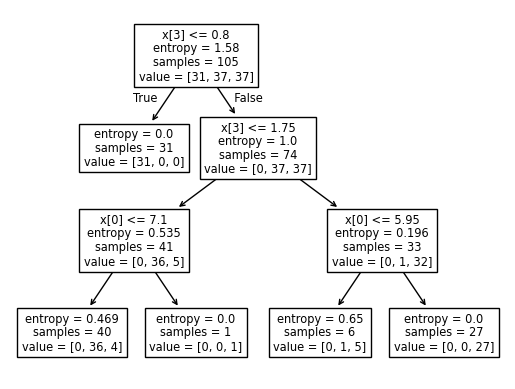

In [32]:
from sklearn import tree

print(tree.plot_tree(grid.best_estimator_))